# Phishing Website Detection Project

In [113]:
# Written by Ovi, 2023-11-25
# This script handles the data collection and preprocessing steps for the PhishGuard project.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
import pickle
# Load the dataset
file_path = 'PhishingData.csv'
phishing_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for an overview
phishing_data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [2]:
# Written by Ovi, 2023-11-25
# Revised preprocessing steps for the PhishGuard project.

# Load the dataset again to ensure a fresh start
phishing_data = pd.read_csv(file_path)

# Dropping the 'index' column if it's not relevant for analysis
if 'index' in phishing_data.columns:
    phishing_data.drop('index', axis=1, inplace=True)

# Checking for missing values again
missing_values = phishing_data.isnull().sum()

# Since the dataset seems to be entirely numerical, we'll focus on numerical transformations.
# Creating a pipeline for numerical features: imputation and scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Scale features
])

# Apply this transformation to the entire dataset as it contains only numerical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, phishing_data.columns)
])

# Splitting the dataset into features (X) and target (y)
X = phishing_data.drop('Result', axis=1)
y = phishing_data['Result']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply the same preprocessing to the test data (only transform, not fit)
X_test_preprocessed = preprocessor.transform(X_test)

# Display the shapes of the preprocessed training and test sets and missing values if any
X_train_preprocessed.shape, X_test_preprocessed.shape, missing_values


ValueError: A given column is not a column of the dataframe

In [3]:
# Written by Ovi, 2023-11-25
# Revised preprocessing steps for the PhishGuard project, ensuring correct handling of the 'Result' column.

# Reload the dataset
phishing_data = pd.read_csv(file_path)

# Drop the 'index' column if present
if 'index' in phishing_data.columns:
    phishing_data.drop('index', axis=1, inplace=True)

# Check for missing values
missing_values = phishing_data.isnull().sum()

# Since the dataset is primarily numerical, we will apply scaling to all features except the target
# Splitting the dataset into features (X) and target (y)
X = phishing_data.drop('Result', axis=1)
y = phishing_data['Result']

# Define a scaler for numerical features
scaler = StandardScaler()

# Apply the scaler to the feature set
X_scaled = scaler.fit_transform(X)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the scaled and split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape, missing_values


((8844, 31),
 (2211, 31),
 (8844,),
 (2211,),
 index                           0
 having_IPhaving_IP_Address      0
 URLURL_Length                   0
 Shortining_Service              0
 having_At_Symbol                0
 double_slash_redirecting        0
 Prefix_Suffix                   0
 having_Sub_Domain               0
 SSLfinal_State                  0
 Domain_registeration_length     0
 Favicon                         0
 port                            0
 HTTPS_token                     0
 Request_URL                     0
 URL_of_Anchor                   0
 Links_in_tags                   0
 SFH                             0
 Submitting_to_email             0
 Abnormal_URL                    0
 Redirect                        0
 on_mouseover                    0
 RightClick                      0
 popUpWidnow                     0
 Iframe                          0
 age_of_domain                   0
 DNSRecord                       0
 web_traffic                     0
 Page_Ran

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Building the FNN model
def build_fnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train FNN model
fnn_model = build_fnn_model(X_train.shape[1])
fnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate FNN model on test data
fnn_test_loss, fnn_test_accuracy = fnn_model.evaluate(X_test, y_test, verbose=0)
print(f"FNN Test Accuracy: {fnn_test_accuracy:.4f}")

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions and evaluation for XGBoost model
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")


# New Beginning

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [52]:
# Load the dataset
file_path = 'PhishingData.csv'
phishing_data = pd.read_csv(file_path)

In [53]:
phishing_data.shape

(11055, 32)

In [54]:
# Display the first few rows of the dataset for an overview
phishing_data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [55]:
# Name of columns
list(phishing_data.columns)

['index ',
 'having_IPhaving_IP_Address ',
 'URLURL_Length ',
 'Shortining_Service ',
 'having_At_Symbol ',
 'double_slash_redirecting ',
 'Prefix_Suffix ',
 'having_Sub_Domain ',
 'SSLfinal_State ',
 'Domain_registeration_length ',
 'Favicon ',
 'port ',
 'HTTPS_token ',
 'Request_URL ',
 'URL_of_Anchor ',
 'Links_in_tags ',
 'SFH ',
 'Submitting_to_email ',
 'Abnormal_URL ',
 'Redirect ',
 'on_mouseover ',
 'RightClick ',
 'popUpWidnow ',
 'Iframe ',
 'age_of_domain ',
 'DNSRecord ',
 'web_traffic ',
 'Page_Rank ',
 'Google_Index ',
 'Links_pointing_to_page ',
 'Statistical_report ',
 'Result']

In [16]:
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   index                         11055 non-null  int64
 1   having_IPhaving_IP_Address    11055 non-null  int64
 2   URLURL_Length                 11055 non-null  int64
 3   Shortining_Service            11055 non-null  int64
 4   having_At_Symbol              11055 non-null  int64
 5   double_slash_redirecting      11055 non-null  int64
 6   Prefix_Suffix                 11055 non-null  int64
 7   having_Sub_Domain             11055 non-null  int64
 8   SSLfinal_State                11055 non-null  int64
 9   Domain_registeration_length   11055 non-null  int64
 10  Favicon                       11055 non-null  int64
 11  port                          11055 non-null  int64
 12  HTTPS_token                   11055 non-null  int64
 13  Request_URL                   1

In [17]:
# You can see that there are no missing values in the Dataset
for col in phishing_data.columns:
    unique_value_list = phishing_data[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {phishing_data[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

index  has 11055 unique values
having_IPhaving_IP_Address  contains:			[-1  1]
URLURL_Length  contains:			[ 1  0 -1]
Shortining_Service  contains:			[ 1 -1]
having_At_Symbol  contains:			[ 1 -1]
double_slash_redirecting  contains:			[-1  1]
Prefix_Suffix  contains:			[-1  1]
having_Sub_Domain  contains:			[-1  0  1]
SSLfinal_State  contains:			[-1  1  0]
Domain_registeration_length  contains:			[-1  1]
Favicon  contains:			[ 1 -1]
port  contains:			[ 1 -1]
HTTPS_token  contains:			[-1  1]
Request_URL  contains:			[ 1 -1]
URL_of_Anchor  contains:			[-1  0  1]
Links_in_tags  contains:			[ 1 -1  0]
SFH  contains:			[-1  1  0]
Submitting_to_email  contains:			[-1  1]
Abnormal_URL  contains:			[-1  1]
Redirect  contains:			[0 1]
on_mouseover  contains:			[ 1 -1]
RightClick  contains:			[ 1 -1]
popUpWidnow  contains:			[ 1 -1]
Iframe  contains:			[ 1 -1]
age_of_domain  contains:			[-1  1]
DNSRecord  contains:			[-1  1]
web_traffic  contains:			[-1  0  1]
Page_Rank  contains:			[-1  1]
Google

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

In [56]:
#Replacing -1 with 0 
phishing_data['Result']=phishing_data['Result'].replace(-1,0)

# Pre Processing


In [57]:
# Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling

phishing_data = phishing_data.drop(phishing_data.columns[0],axis=1)

In [58]:
phishing_data

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,0
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,0
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,0


Result
1    6157
0    4898
Name: count, dtype: int64


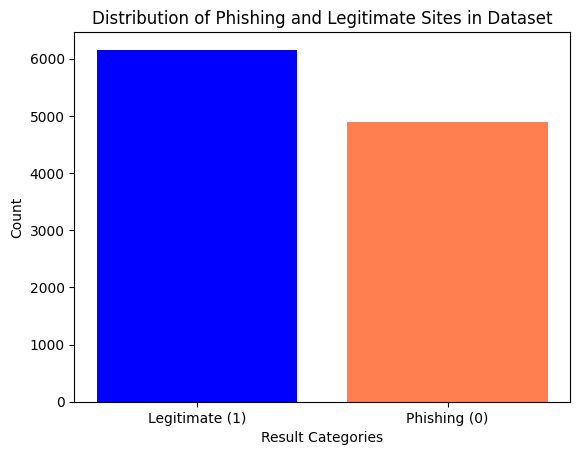

In [72]:
# Count the occurrences of each category in the 'Result' column
result_counts = phishing_data['Result'].value_counts()
print(phishing_data['Result'].value_counts())
# Defining colors for the bar chart based on the index of result_counts
# (assuming -1 for Phishing and 1 for Legitimate)
colors = ['Coral' if index == 0 else 'blue' for index in result_counts.index]

# Define labels for the categories
labels = ['Legitimate (1)','Phishing (0)']

# Create an enhanced bar chart
plt.bar(labels, result_counts.values, color=colors)
plt.xlabel('Result Categories')
plt.ylabel('Count')
plt.title('Distribution of Phishing and Legitimate Sites in Dataset')
plt.show()

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

<Axes: >

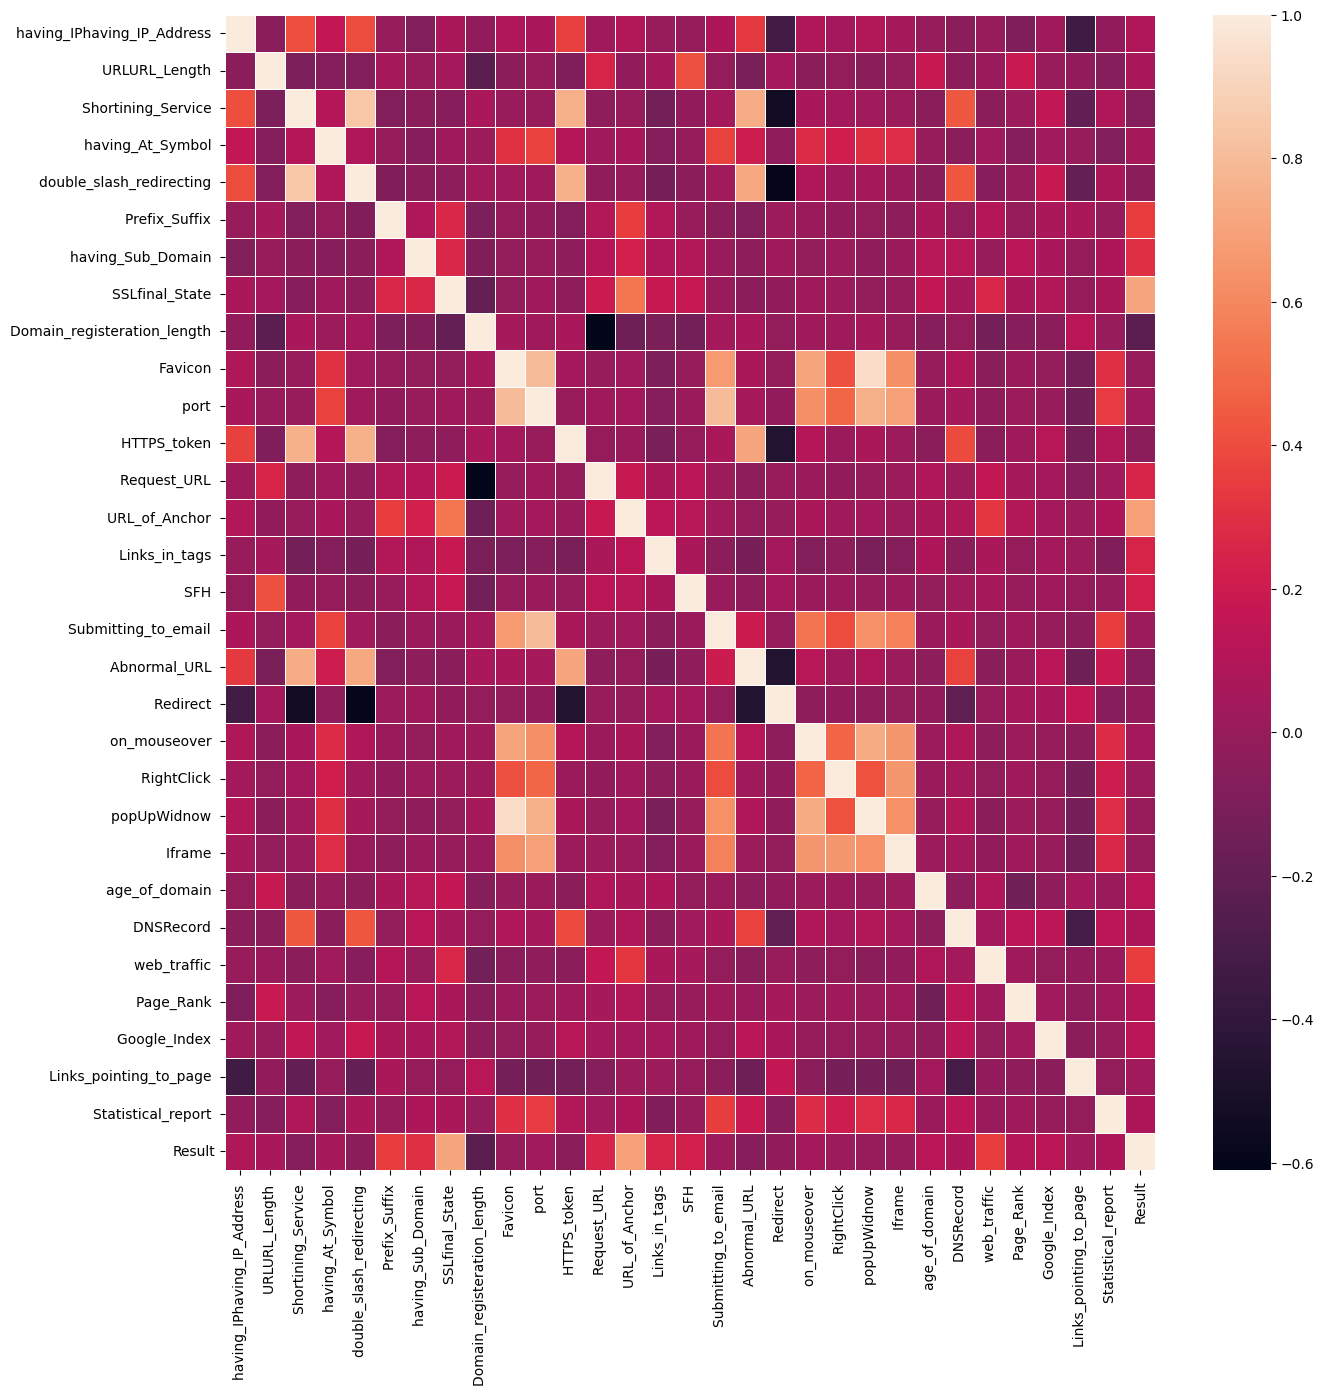

In [33]:
# The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.
plt.figure(figsize=(15, 15))
sns.heatmap(phishing_data.corr(), linewidths=.5)

In [60]:
# Print correlation with target variable
print(phishing_data.corr()['Result'].sort_values())   

Domain_registeration_length    -0.225789
Shortining_Service             -0.067966
Abnormal_URL                   -0.060488
HTTPS_token                    -0.039854
double_slash_redirecting       -0.038608
Redirect                       -0.020113
Iframe                         -0.003394
Favicon                        -0.000280
popUpWidnow                     0.000086
RightClick                      0.012653
Submitting_to_email             0.018249
Links_pointing_to_page          0.032574
port                            0.036419
on_mouseover                    0.041838
having_At_Symbol                0.052948
URLURL_Length                   0.057430
DNSRecord                       0.075718
Statistical_report              0.079857
having_IPhaving_IP_Address      0.094160
Page_Rank                       0.104645
age_of_domain                   0.121496
Google_Index                    0.128950
SFH                             0.221419
Links_in_tags                   0.248229
Request_URL     

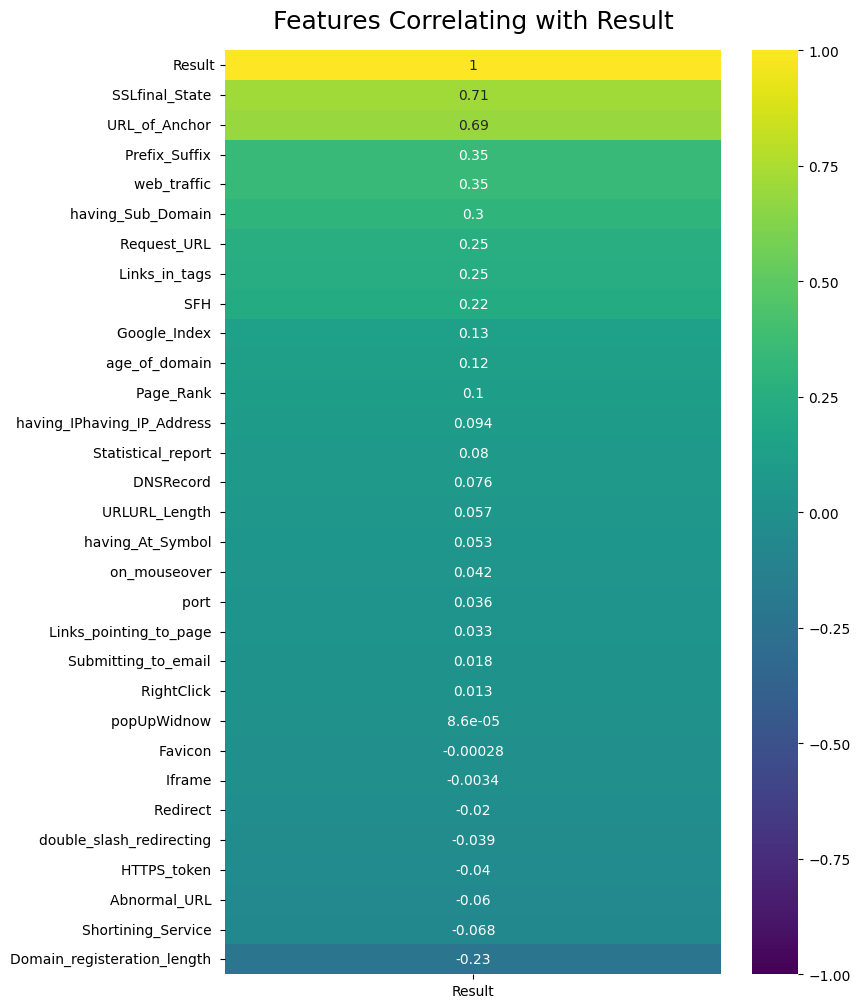

In [109]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(phishing_data.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

Note that feature `popUpWindow` and `favicon` are highly correlated. Looking at the definitions of these features from the Data description, we can say that, for websites where favicon is loaded from external links the pop-up window mostly contains text field. This is said just by seeing the high correlation. Dropping one of the features or not is an experimental decision.

Note that some features are negatively correlated but the color index minimum correlation is upto -0.6. Negative correlations are where one feature marks it as phishing and other don't.

# XGBOOST Modelling

We will be using a simple tree based classifier and no hyper-parameter tuning to model and test our dataset. Note that we replace -1 with 0 and 0 marks phishing website.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

In [114]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def binary_classification_accuracy(actual, pred):
    
    # print(f'Confusion matrix: \n{confusion_matrix(actual, pred)}')
    print(f'Accuracy score: \n{accuracy_score(actual, pred)}')
    # print(f'Classification report: \n{classification_report(actual, pred)}')

In [118]:
# Replacing -1 with 0 in the target variable
phishing_data['Result'] = np.where(phishing_data['Result']==-1, 0, phishing_data['Result'])
target = phishing_data['Result']
features = phishing_data.drop(columns=['Result'])

==== FOLD 1 ====
Accuracy score: 0.9737793851717902
==== FOLD 2 ====
Accuracy score: 0.9674502712477396
==== FOLD 3 ====
Accuracy score: 0.969258589511754
==== FOLD 4 ====
Accuracy score: 0.9647377938517179
==== FOLD 5 ====
Accuracy score: 0.9665461121157324
==== FOLD 6 ====
Accuracy score: 0.9656108597285068
==== FOLD 7 ====
Accuracy score: 0.9656108597285068
==== FOLD 8 ====
Accuracy score: 0.967420814479638
==== FOLD 9 ====
Accuracy score: 0.967420814479638
==== FOLD 10 ====
Accuracy score: 0.967420814479638


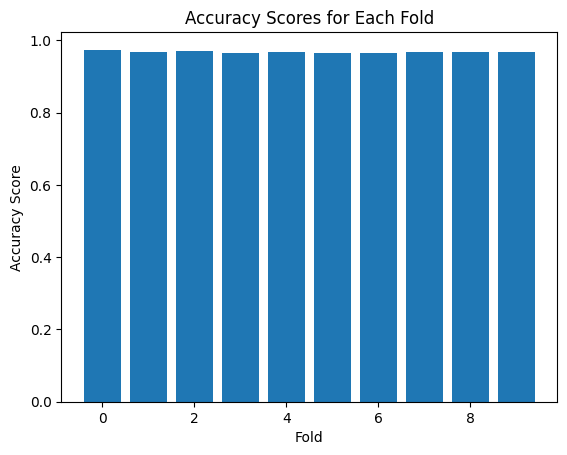

In [119]:
import matplotlib.pyplot as plt

# create empty lists to store the accuracy scores for each fold
accuracy_scores = []

for fold, (train_idx, validation_idx) in enumerate(folds.split(features, target)):
    
    model = XGBClassifier()
    model.fit(np.array(features)[train_idx,:], np.array(target)[train_idx])
    predicted_values = model.predict(np.array(features)[validation_idx,:])
    
    # calculate the accuracy score for this fold
    accuracy = accuracy_score(np.array(target)[validation_idx], predicted_values)
    accuracy_scores.append(accuracy)

    print(f'==== FOLD {fold+1} ====')
    binary_classification_accuracy(np.array(target)[validation_idx], predicted_values)

# create a bar plot to display the accuracy scores for each fold
fig, ax = plt.subplots()
ax.bar(range(len(accuracy_scores)), accuracy_scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy Scores for Each Fold')
plt.show()


35/35 [==============================] - 0s 2ms/step
==== FOLD 1 ====
Accuracy score: 
0.8942133815551537
35/35 [==============================] - 0s 3ms/step
==== FOLD 2 ====
Accuracy score: 
0.9113924050632911
35/35 [==============================] - 0s 5ms/step
==== FOLD 3 ====
Accuracy score: 
0.9023508137432188
35/35 [==============================] - 0s 4ms/step
==== FOLD 4 ====
Accuracy score: 
0.8833634719710669
35/35 [==============================] - 0s 3ms/step
==== FOLD 5 ====
Accuracy score: 
0.8933092224231465
35/35 [==============================] - 0s 3ms/step
==== FOLD 6 ====
Accuracy score: 
0.8868778280542986
35/35 [==============================] - 0s 3ms/step
==== FOLD 7 ====
Accuracy score: 
0.8914027149321267
35/35 [==============================] - 0s 3ms/step
==== FOLD 8 ====
Accuracy score: 
0.8995475113122172
35/35 [==============================] - 0s 2ms/step
==== FOLD 9 ====
Accuracy score: 
0.893212669683258
35/35 [==============================] - 0s 3ms

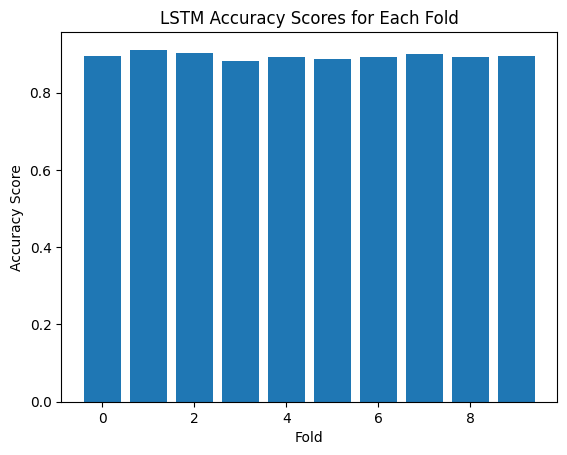

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Function to print binary classification metrics
def binary_classification_accuracy(actual, pred):
    print(f'Accuracy score: \n{accuracy_score(actual, np.round(pred))}')

# # Replace -1 with 0 in the target variable for compatibility with LSTM
# phishing_data['Result'] = np.where(phishing_data['Result'] == -1, 0, phishing_data['Result'])
target = phishing_data['Result']
features = phishing_data.drop(columns=['Result'])

# Scale features for LSTM
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Reshape target to be a 2D array for to_categorical
target = to_categorical(target)

# KFold cross-validation setup
n_splits = 10
folds = KFold(n_splits=n_splits, shuffle=True)

# create empty lists to store the accuracy scores for each fold
accuracy_scores = []

# LSTM model training and evaluation in KFold cross-validation
for fold, (train_idx, validation_idx) in enumerate(folds.split(features, target)):
    
    # Define LSTM model structure
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(features.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(2, activation='softmax'))  # Binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Reshape features for LSTM
    train_X = np.array(features)[train_idx].reshape(-1, features.shape[1], 1)
    val_X = np.array(features)[validation_idx].reshape(-1, features.shape[1], 1)
    train_Y = np.array(target)[train_idx]
    val_Y = np.array(target)[validation_idx]
    
    # Fit the model on the training data
    model.fit(train_X, train_Y, epochs=10, batch_size=32, verbose=0)
    
    # Predict on the validation data
    predicted_values = model.predict(val_X)
    
    # Calculate the accuracy score for this fold
    accuracy = accuracy_score(np.argmax(val_Y, axis=1), np.argmax(predicted_values, axis=1))
    accuracy_scores.append(accuracy)

    print(f'==== FOLD {fold+1} ====')
    binary_classification_accuracy(np.argmax(val_Y, axis=1), np.argmax(predicted_values, axis=1))

# create a bar plot to display the accuracy scores for each fold
fig, ax = plt.subplots()
ax.bar(range(len(accuracy_scores)), accuracy_scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy Score')
ax.set_title('LSTM Accuracy Scores for Each Fold')
plt.show()



==== FOLD 1 ====
Accuracy score: 0.9665461121157324
==== FOLD 2 ====
Accuracy score: 0.9629294755877035
==== FOLD 3 ====
Accuracy score: 0.9710669077757685
==== FOLD 4 ====
Accuracy score: 0.9701627486437613
==== FOLD 5 ====
Accuracy score: 0.9665461121157324
==== FOLD 6 ====
Accuracy score: 0.971945701357466
==== FOLD 7 ====
Accuracy score: 0.96289592760181
==== FOLD 8 ====
Accuracy score: 0.9764705882352941
==== FOLD 9 ====
Accuracy score: 0.9755656108597285
==== FOLD 10 ====
Accuracy score: 0.967420814479638


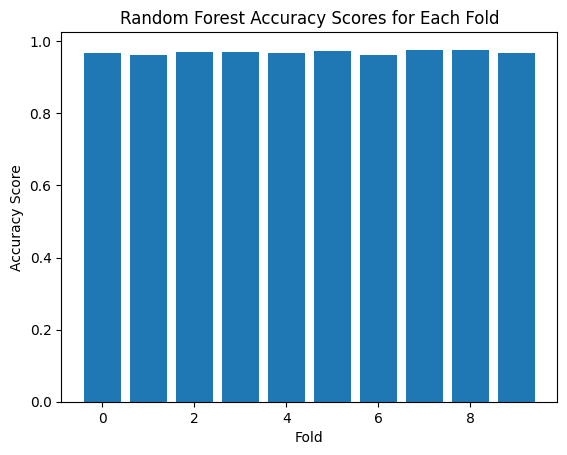

In [123]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'phishing_data' is a pandas DataFrame that has been loaded previously.
# Replace -1 with 0 in the target variable for compatibility with Random Forest
phishing_data['Result'] = np.where(phishing_data['Result'] == -1, 0, phishing_data['Result'])
target = phishing_data['Result'].values
features = phishing_data.drop(columns=['Result']).values

# KFold cross-validation setup
n_splits = 10
folds = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# create empty lists to store the accuracy scores for each fold
rf_accuracy_scores = []

# Random Forest model training and evaluation in KFold cross-validation
for fold, (train_idx, validation_idx) in enumerate(folds.split(features, target)):
    
    # Define Random Forest model structure
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Fit the model on the training data
    model.fit(features[train_idx], target[train_idx])
    
    # Predict on the validation data
    predicted_values = model.predict(features[validation_idx])
    
    # Calculate the accuracy score for this fold
    accuracy = accuracy_score(target[validation_idx], predicted_values)
    rf_accuracy_scores.append(accuracy)

    print(f'==== FOLD {fold+1} ====')
    print(f'Accuracy score: {accuracy}')

# create a bar plot to display the accuracy scores for each fold
fig, ax = plt.subplots()
ax.bar(range(len(rf_accuracy_scores)), rf_accuracy_scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy Score')
ax.set_title('Random Forest Accuracy Scores for Each Fold')
plt.show()


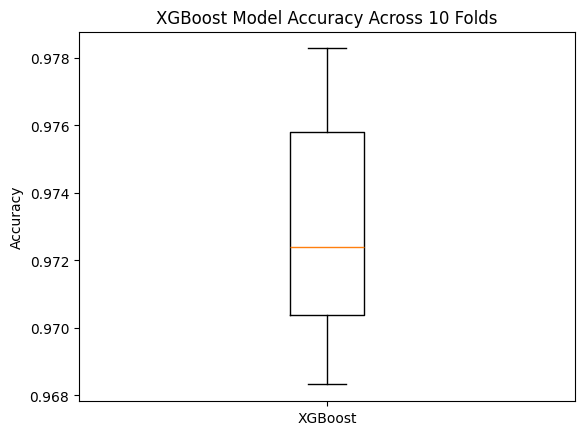

In [48]:
import matplotlib.pyplot as plt

# Accuracy scores from the 10 folds
accuracy_scores = [
    0.9710669077757685, 0.9701627486437613, 0.972875226039783, 
    0.976491862567812, 0.9701627486437613, 0.9773755656108597, 
    0.971945701357466, 0.9782805429864253, 0.9737556561085973, 
    0.9683257918552036
]

# Create a box plot
plt.boxplot(accuracy_scores)
plt.title('XGBoost Model Accuracy Across 10 Folds')
plt.ylabel('Accuracy')
plt.xticks([1], ['XGBoost'])
plt.show()


# A new segment

In [81]:
from sklearn.model_selection import train_test_split,cross_val_score
from time import perf_counter

X= phishing_data.drop(columns='Result')
Y=phishing_data['Result']

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)
Accuracy=[]
Duration=[]

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
start = perf_counter()
logreg=LogisticRegression(solver='liblinear')
logreg=logreg.fit(train_X,train_Y)
prediction=logreg.predict(test_X)
accuracy_score(prediction,test_Y)
Accuracy.append(accuracy_score(prediction,test_Y))
print(Accuracy[0])

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[0])

0.9231233041905336
0.08


In [83]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
start = perf_counter()
clf = BernoulliNB()
clf.fit(train_X, train_Y)
naive_predict=clf.predict(test_X)
accuracy_score(naive_predict,test_Y)
Accuracy.append(accuracy_score(naive_predict,test_Y))
print(Accuracy[1])

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[1])

0.9035272836900814
0.01


In [84]:
from sklearn.ensemble import RandomForestClassifier
start = perf_counter()
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
accuracy_score(ran_pred,test_Y)
Accuracy.append(accuracy_score(ran_pred,test_Y))
print(Accuracy[2])

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[2])

0.9520651190835092
0.25


In [85]:
from sklearn.tree import DecisionTreeClassifier
start = perf_counter()
tree = DecisionTreeClassifier(criterion='entropy') # function to measure the quality of split 
tree.fit(train_X,train_Y)
score = cross_val_score(tree, X, Y, cv= 10) 
print(score)
print(score.mean())
y_pred = tree.predict(test_X)
Accuracy.append(accuracy_score(y_pred,test_Y))
print(Accuracy[3])

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[3])

[0.98643761 0.98282098 0.97016275 0.98462929 0.97830018 0.96923077
 0.9438914  0.93031674 0.94841629 0.94570136]
0.9639907374829193
0.968947844437745
0.15


In [86]:
model=["LogisticRegression", "BernoulliNB","RandomForestClassifier", "DecisionTreeClassifier"]
models_acc = []
for i in range(0,4):
    models_acc.append([model[i],Accuracy[i],Duration[i]])
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy,Training time (sec)
0,DecisionTreeClassifier,0.968948,0.15
1,RandomForestClassifier,0.952065,0.25
2,LogisticRegression,0.923123,0.08
3,BernoulliNB,0.903527,0.01


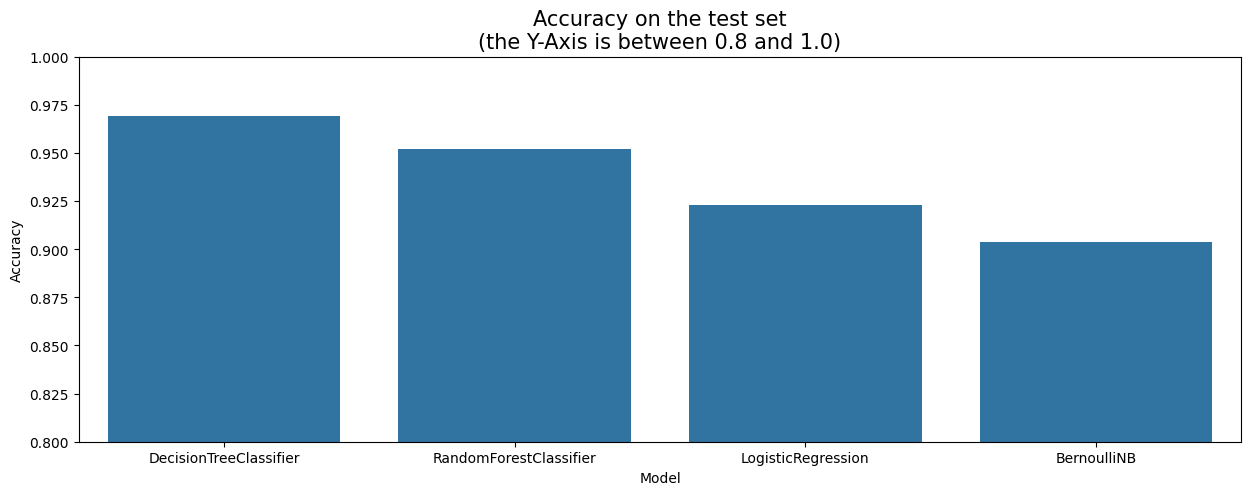

In [90]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.8,1)
plt.show()

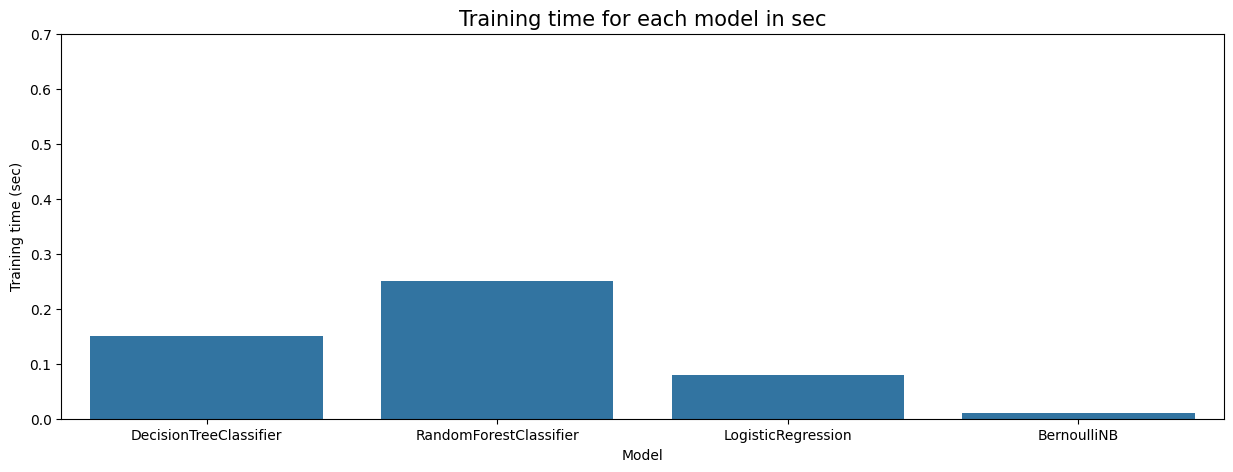

In [91]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,0.7)
plt.show()

---

# Testing 5 Different Models

### Spliting into training and testing

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X= phishing_data.drop(columns='Result')
Y=phishing_data['Result']

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

## 1)Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(train_X,train_Y)
pred=lr.predict(test_X)
accuracy_score(pred,test_Y)

0.9240277359059391

## 2)KNeighbors Classfier

In [96]:
knn=KNeighborsClassifier(n_neighbors=3)
model= knn.fit(train_X,train_Y)

knn_predict=model.predict(test_X)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(knn_predict,test_Y)

0.9448296653602652

## 3)Naive Bayes

In [121]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(train_X, train_Y)
naive_predict=clf.predict(test_X)
accuracy_score(naive_predict,test_Y)

0.9035272836900814

## 4)Random Forest


In [120]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
accuracy_score(ran_pred,test_Y)

0.9520651190835092

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [100]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [101]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X,train_Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.2s
[CV] END bootstrap=False, max_depth=10, 

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-package

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [102]:
rf_random.best_params_


{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [103]:
forest_clf = RandomForestClassifier(bootstrap=False,max_depth=90,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=800)
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
accuracy_score(ran_pred,test_Y)

0.9716611395839614

## 5)SVM

In [105]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(train_X,train_Y) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   1.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.576 total time=   1.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.578 total time=   1.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   1.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.919 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.931 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.941 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.913 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [106]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [107]:
from sklearn.svm import SVC
svm_clf =SVC(C=10, gamma=0.1, kernel='rbf')
svm_clf.fit(train_X,train_Y)
pred=svm_clf.predict(test_X)
accuracy_score(pred,test_Y)

0.9692493216762135

---

# > Saving the model

In [ ]:
import pickle

# Save the model to a file using pickle
filename = 'logistic_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(LG, file)

In [ ]:
# Load the model from the pickle file
filename = 'logistic_regression_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
loaded_model.predict(X_pred)

---

# Problem Statement
**Phishing is a form of fraud in which the attacker tries to learn sensitive information such as login credentials or account information by sending as a reputable entity or person in email or other communication channels.**
Typically a victim receives a message that appears to have been sent by a known contact or organization. The message contains malicious software targeting the user’s computer or has links to direct victims to malicious websites in order to trick them into divulging personal and financial information, such as passwords, account IDs or credit card details.

In this notebook we will see what all features can we derive and use from the domain/URL of a website to detect whether it is phishing or not. First of all let us understand the breakdown of a URL.

# Domain Analysis

**URL components** <br>
Uniform Resource Locator (URL) is created to address web pages. The figure below shows relevant parts in the structure of a typical URL.

<img src='https://miro.medium.com/max/1400/1*mPoNQ5LUkuOTog1dUb1EFw.png' width=600></img>

A phisher has full control over the subdomain portions and can set any value to it. The URL may also have a path and file components which, too, can be changed by the phisher at will. The subdomain name and path are fully controllable by the phisher. We use the term FreeURL to refer to those parts of the URL in the rest of the article.<br>
The attacker can register any domain name that has not been registered before. This part of URL can be set only once. The phisher can change FreeURL at any time to create a new URL. The reason security defenders struggle to detect phishing domains is because of the unique part of the website domain (the FreeURL). When a domain detected as a fraudulent, it is easy to prevent this domain before an user access to it.

# Dataset description

There are 4 types of features that we can extract from the URL.
- Address Bar based Features
- Abnormal Based Features
- HTML and JavaScript based Features
- Domain based Features

### Address Bar based Features
1. **Using the IP Address**<br>
If an IP address is used as an alternative of the domain name in the URL, such as “http://125.98.3.123/fake.html”, users can be sure that someone is trying to steal their personal information. Sometimes, the IP address is even transformed into hexadecimal code as shown in the following link “http://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html”.
> RULE: IF <br>
{If The Domain Part has an IP Address → Phishing<br>
{Otherwise→ Legitimate

2. **Long URL to Hide the Suspicious Part**<br>
Phishers can use long URL to hide the doubtful part in the address bar. For example: 
http://federmacedoadv.com.br/3f/aze/ab51e2e319e51502f416dbe46b773a5e/?cmd=_home&amp;dispatch=11004d58f5b74f8dc1e7c2e8dd4105e811004d58f5b74f8dc1e7c2e8dd4105e8@phishing.website.html
To ensure accuracy of our study, we calculated the length of URLs in the dataset and produced an average URL length. The results showed that if the length of the URL is greater than or equal 54 characters then the URL classified as phishing. By reviewing our dataset we were able to find 1220 URLs lengths equals to 54 or more which constitute 48.8% of the total dataset size. We have been able to update this feature rule by using a method based on frequency and thus improving upon its accuracy.
> RULE: IF<br>
{URL length<54 → feature = Legitimate<br>
{else if URL length≥54 and ≤75 → feature = Suspicious<br>
{otherwise→ feature = Phishing

3. **Using URL Shortening Services “TinyURL”**<br>
URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL. For example, the URL “http://portal.hud.ac.uk/” can be shortened to “bit.ly/19DXSk4”.
> RULE: IF<br>
{TinyURL → Phishing<br>
{Otherwise→ Legitimate

4. **URL’s having “@” Symbol**<br>
Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.
>RULE: IF<br>
{Url Having @ Symbol→ Phishing<br>
{Otherwise→ Legitimate

5. **Redirecting using “//”**<br>
The existence of “//” within the URL path means that the user will be redirected to another website. An example of such URL’s is: “http://www.legitimate.com//http://www.phishing.com”. We examin the location where the “//” appears. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.
>RULE: IF<br>
{The Position of the Last Occurrence of "//\" " in the URL > 7→ Phishing<br>
{Otherwise→ Legitimate

6. **Adding Prefix or Suffix Separated by (-) to the Domain**<br>
The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage. For example http://www.Confirme-paypal.com/.
>RULE: IF<br>
{Domain Name Part Includes (-) Symbol → Phishing<br>
{Otherwise → Legitimate

7. **Sub Domain and Multi Sub Domains**<br>
Let us assume we have the following link: http://www.hud.ac.uk/students/. A domain name might include the country-code top-level domains (ccTLD), which in our example is “uk”. The “ac” part is shorthand for “academic”, the combined “ac.uk” is called a second-level domain (SLD) and “hud” is the actual name of the domain. To produce a rule for extracting this feature, we firstly have to omit the (www.) from the URL which is in fact a sub domain in itself. Then, we have to remove the (ccTLD) if it exists. Finally, we count the remaining dots. If the number of dots is greater than one, then the URL is classified as “Suspicious” since it has one sub domain. However, if the dots are greater than two, it is classified as “Phishing” since it will have multiple sub domains. Otherwise, if the URL has no sub domains, we will assign “Legitimate” to the feature.
> RULE: IF<br>
{Dots In Domain Part=1 → Legitimate<br>
{Dots In Domain Part=2 → Suspicious<br>
{Otherwise→ Phishing

8. **HTTPS (Hyper Text Transfer Protocol with Secure Sockets Layer)**<br>
The existence of HTTPS is very important in giving the impression of website legitimacy, but this is clearly not enough. The authors in (Mohammad, Thabtah and McCluskey 2012) (Mohammad, Thabtah and McCluskey 2013) suggest checking the certificate assigned with HTTPS including the extent of the trust certificate issuer, and the certificate age. Certificate Authorities that are consistently listed among the top trustworthy names include: “GeoTrust, GoDaddy, Network Solutions, Thawte, Comodo, Doster and VeriSign”. Furthermore, by testing out our datasets, we find that the minimum age of a reputable certificate is two years.
>RULE: IF<br>
{Use https and Issuer Is Trusted &and Age of Certificate≥ 1 Years → Legitimate<br>
{Using https and Issuer Is Not Trusted  → Suspicious<br>
{Otherwise→ Phishing

9. **Domain Registration Length**<br>
Based on the fact that a phishing website lives for a short period of time, we believe that trustworthy domains are regularly paid for several years in advance. In our dataset, we find that the longest fraudulent domains have been used for one year only.
>RULE: IF<br>
{Domains Expires on≤ 1 years → Phishing<br>
{Otherwise→ Legitimate

10. **Favicon**<br>
A favicon is a graphic image (icon) associated with a specific webpage. Many existing user agents such as graphical browsers and newsreaders show favicon as a visual reminder of the website identity in the address bar. If the favicon is loaded from a domain other than that shown in the address bar, then the webpage is likely to be considered a Phishing attempt.
>RULE: IF<br>
{Favicon Loaded From External Domain→ Phishing<br>
{Otherwise→ Legitimate

11. **Using Non-Standard Port**<br>
This feature is useful in validating if a particular service (e.g. HTTP) is up or down on a specific server. In the aim of controlling intrusions, it is much better to merely open ports that you need. Several firewalls, Proxy and Network Address Translation (NAT) servers will, by default, block all or most of the ports and only open the ones selected. If all ports are open, phishers can run almost any service they want and as a result, user information is threatened.
>RULE: IF<br>
{"Port # is of the " Preffered Status→ Phishing<br>
{Otherwise→ Legitimate

12. **The Existence of “HTTPS” Token in the Domain Part of the URL**<br>
The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users. For example,
http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/.
>RULE: IF<br>
{"Using " HTTP Token in Domain Part of The URL→ Phishing<br>
{Otherwise→ Legitimate


### Abnormal Based Features
1. **Request URL**<br>
Request URL examines whether the external objects contained within a webpage such as images, videos and sounds are loaded from another domain. In legitimate webpages, the webpage address and most of objects embedded within the webpage are sharing the same domain. 
>Rule: IF<br>
{% of Request URL <22% → Legitimate<br>
{%of Request URL≥22% and 61%→ Suspicious<br>
{Otherwise→ feature=Phishing

2. **URL of Anchor**<br>
An anchor is an element defined by the ```<a>``` tag. This feature is treated exactly as “Request URL”. However, for this feature we examine:
	If the ```<a>``` tags and the website have different domain names. This is similar to request URL feature. 
	If the anchor does not link to any webpage, e.g.:<br>
	```<a href=“#”>```<br>
	```<a href=“#content”>```<br>
	```<a href=“#skip”>```<br>
	```<a href=“JavaScript ::void(0)”>```<br>
>Rule:  IF<br>
{% of URL Of Anchor <31%  → Legitimate<br>
{% of URL Of Anchor ≥31% and ≤67% → Suspicious<br> 
{Otherwise→ Phishing

3. **Links in ```<Meta>, <Script>``` and ```<Link>``` tags**<br>
Given that our investigation covers all angles likely to be used in the webpage source code, we find that it is common for legitimate websites to use ```<Meta>``` tags to offer metadata about the HTML document; ```<Script>``` tags to create a client side script; and ```<Link>``` tags to retrieve other web resources. It is expected that these tags are linked to the same domain of the webpage. 
>Rule: IF<br>
{% of Links in ```<Meta>```,```<Script>``` and ```<Link>```<17%  → Legitimate<br>
{% of Links in ```<Meta>```,```<Script>``` and ```<Link>``` ≥17% And≤81% → Suspicious<br>
{Otherwise→ Phishing

4. **Server Form Handler (SFH)**<br>
SFHs that contain an empty string or “about:blank” are considered doubtful because an action should be taken upon the submitted information. In addition, if the domain name in SFHs is different from the domain name of the webpage, this reveals that the webpage is suspicious because the submitted information is rarely handled by external domains. 
>Rule: IF<br>
{SFH is ""about: blank\"" Or Is Empty → Phishing<br>
{SFH "Refers To " A Different Domain→ Suspicious<br>
{Otherwise  → Legitimate

5. **Submitting Information to Email**<br>
Web form allows a user to submit his personal information that is directed to a server for processing. A phisher might redirect the user’s information to his personal email. To that end, a server-side script language might be used such as “mail()” function in PHP. One more client-side function that might be used for this purpose is the “mailto:” function. 
>Rule: IF<br>
{Using ""mail()\" or \"mailto:\" Function to Submit User Information" → Phishing<br>
{Otherwise  → Legitimate

6. **Abnormal URL**<br>
This feature can be extracted from WHOIS database. For a legitimate website, identity is typically part of its URL. 
>Rule: IF<br>
{The Host Name Is Not Included In URL → Phishing<br>
{Otherwise→ Legitimate
    
### HTML and JavaScript based Features
1. **Website Forwarding**
The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times. 
>Rule: IF<br> 
{Number of Redirect Page ≤ 1 → Legitimate<br>
{Number of Redirect Page ≥ 2 And < 4 → Suspicious<br>
{Otherwise → Phishing

2. **Status Bar Customization**
Phishers may use JavaScript to show a fake URL in the status bar to users. To extract this feature, we must dig-out the webpage source code, particularly the “onMouseOver” event, and check if it makes any changes on the status bar. 
>Rule: IF<br>
{onMouseOver Changes Status Bar→ Phishing<br>
{It Does't Change Status Bar → Legitimate

3. **Disabling Right Click**
Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. This feature is treated exactly as “Using onMouseOver to hide the Link”. Nonetheless, for this feature, we will search for event “event.button==2” in the webpage source code and check if the right click is disabled. 
>Rule: IF<br>
{Right Click Disabled → Phishing<br>
{Otherwise → Legitimate

4. **Using Pop-up Window**
It is unusual to find a legitimate website asking users to submit their personal information through a pop-up window. On the other hand, this feature has been used in some legitimate websites and its main goal is to warn users about fraudulent activities or broadcast a welcome announcement, though no personal information was asked to be filled in through these pop-up windows.
>Rule: IF<br> 
{Popoup Window Contains Text Fields → Phishing<br>
{Otherwise → Legitimate

5. **IFrame Redirection**
IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation. 
>Rule: IF<br>
{Using iframe → Phishing<br>
{Otherwise → Legitimate

### Domain based Features
1. **Age of Domain**<br>
This feature can be extracted from WHOIS database (Whois 2005). Most phishing websites live for a short period of time. By reviewing our dataset, we find that the minimum age of the legitimate domain is 6 months. 
>Rule: IF<br>
{Age Of Domain≥6 months → Legitimate<br>
{Otherwise → Phishing

2. **DNS Record**<br>
For phishing websites, either the claimed identity is not recognized by the WHOIS database (Whois 2005) or no records founded for the hostname (Pan and Ding 2006). If the DNS record is empty or not found then the website is classified as “Phishing”, otherwise it is classified as “Legitimate”. 
>Rule: IF<br>
{no DNS Record For The Domain → Phishing<br>
{Otherwise → Legitimate

3. **Website Traffic**<br>
This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. However, since phishing websites live for a short period of time, they may not be recognized by the Alexa database (Alexa the Web Information Company., 1996). By reviewing our dataset, we find that in worst scenarios, legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic or is not recognized by the Alexa database, it is classified as “Phishing”. Otherwise, it is classified as “Suspicious”. 
>Rule: IF<br>
{Website Rank<100,000 → Legitimate<br>
{Website Rank>100,000 → Suspicious<br>
{Otherwise → Phishing
	
4. **PageRank**<br>
PageRank is a value ranging from “0” to “1”. PageRank aims to measure how important a webpage is on the Internet. The greater the PageRank value the more important the webpage. In our datasets, we find that about 95% of phishing webpages have no PageRank. Moreover, we find that the remaining 5% of phishing webpages may reach a PageRank value up to “0.2”. 
>Rule: IF<br>
{PageRank<0.2 → Phishing<br>
{Otherwise → Legitimate
	
5. **Google Index**<br>
This feature examines whether a website is in Google’s index or not. When a site is indexed by Google, it is displayed on search results (Webmaster resources, 2014). Usually, phishing webpages are merely accessible for a short period and as a result, many phishing webpages may not be found on the Google index. 
>Rule: IF<br>
{Webpage Indexed by Google → Legitimate<br>
{Otherwise → Phishing
	
6. **Number of Links Pointing to Page**<br>
The number of links pointing to the webpage indicates its legitimacy level, even if some links are of the same domain (Dean, 2014). In our datasets and due to its short life span, we find that 98% of phishing dataset items have no links pointing to them. On the other hand, legitimate websites have at least 2 external links pointing to them. 
>Rule: IF<br>
{Number Of Link Pointing to The Webpage=0 → Phishing<br>
{Number Of Link Pointing to The Webpage>0 and ≤ 2 → Suspicious<br>
{Otherwise → Legitimate

7. **Statistical-Reports Based Feature**<br>
Several parties such as PhishTank (PhishTank Stats, 2010-2012), and StopBadware (StopBadware, 2010-2012) formulate numerous statistical reports on phishing websites at every given period of time; some are monthly and others are quarterly. In our research, we used 2 forms of the top ten statistics from PhishTank: “Top 10 Domains” and “Top 10 IPs” according to statistical-reports published in the last three years, starting in January2010 to November 2012. Whereas for “StopBadware”, we used “Top 50” IP addresses.
>Rule: IF<br>
{Host Belongs to Top Phishing IPs or Top Phishing Domains → Phishing<br>
{Otherwise → Legitimate
